In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping={
    'Mon':1,
    'Tue':2,  
    'Wed':3,   
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7,
}
df['flight_day']=df['flight_day'].map(mapping)


In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [17]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [18]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: xlabel='trip_type', ylabel='purchase_lead'>

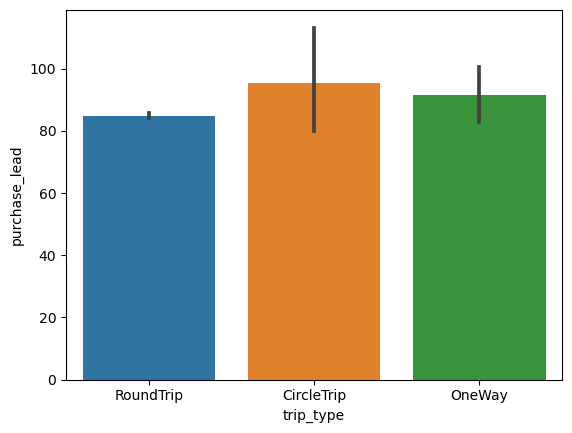

In [29]:
sns.barplot(df,x='trip_type',y='purchase_lead')

<Axes: xlabel='trip_type', ylabel='num_passengers'>

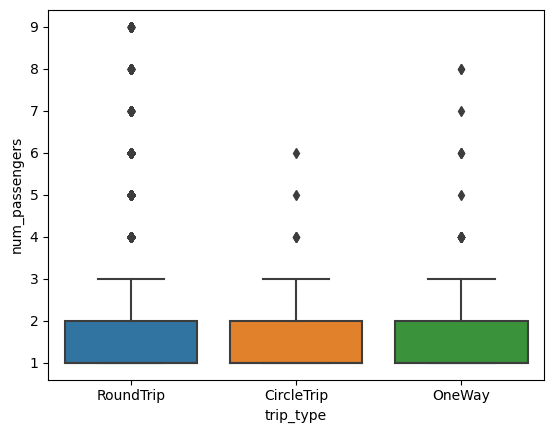

In [38]:
sns.boxplot(df,x='trip_type',y='num_passengers')

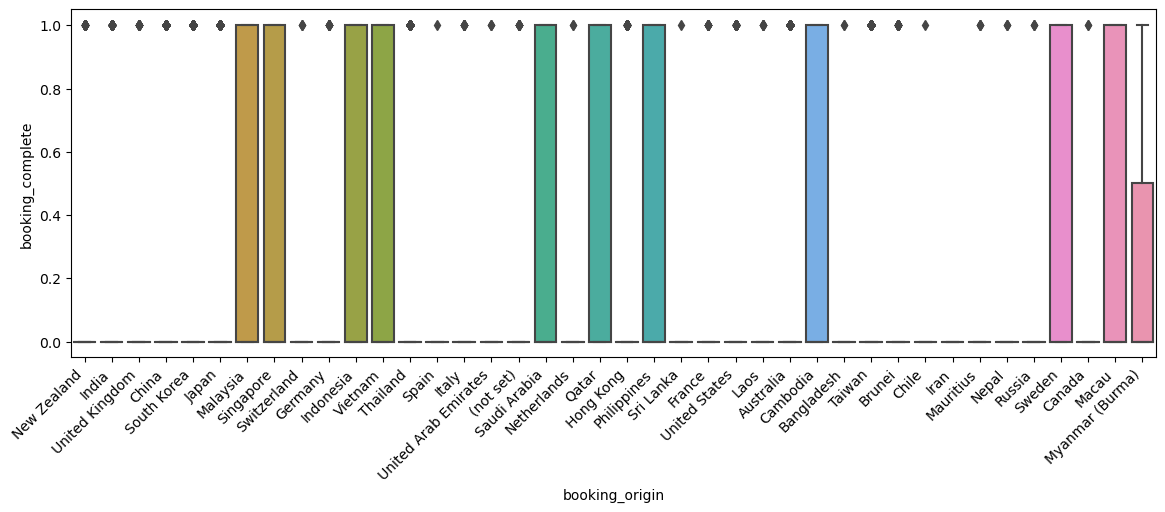

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for the top 40 booking origins
top_40_origins = df['booking_origin'].value_counts().head(40).index.tolist()
df_filtered = df[df['booking_origin'].isin(top_40_origins)]

# 2. Create the boxplot with spacing adjustments
plt.figure(figsize=(14, 6))  # Increase figure size for better spacing
sns.boxplot(data=df_filtered, x='booking_origin', y='booking_complete')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.subplots_adjust(bottom=0.3)  # Increase bottom spacing for labels
plt.show()


In [12]:


# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type',  'route', 'booking_origin'])

# Separate features (X) and target variable (y)
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print or visualize feature importance
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


Accuracy: 0.8536
Confusion Matrix:
 [[8323  197]
 [1267  213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000

Feature Importance:
purchase_lead: 0.1573208843042202
flight_hour: 0.12673697182524254
length_of_stay: 0.11457619879014898
flight_day: 0.09046454214013559
num_passengers: 0.04814293554600073
flight_duration: 0.0345454881264647
booking_origin_Malaysia: 0.028254358744191244
wants_in_flight_meals: 0.02237404842794352
booking_origin_Australia: 0.021108586848827757
wants_preferred_seat: 0.01803181055986077
wants_extra_baggage: 0.015835116046933214
route_PENTPE: 0.007016167377953313
booking_origin_Indonesia: 0.005257518901556492
sales_channel_Mobile: 0.00521102372120392
sales_channel_I

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode categorical variables (excluding 'flight_day')
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'])

# Exclude 'flight_day' from features
X = df_encoded.drop(['booking_complete', 'flight_day'], axis=1)

# Separate target variable (y)
y = df_encoded['booking_complete']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Print or visualize feature importance
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


Accuracy: 0.8515
Confusion Matrix:
 [[8264  256]
 [1229  251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.50      0.17      0.25      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.57      0.59     10000
weighted avg       0.81      0.85      0.82     10000

Feature Importance:
purchase_lead: 0.19292516461491657
flight_hour: 0.15141163751164818
length_of_stay: 0.1321176996816865
num_passengers: 0.05277336092789411
flight_duration: 0.03380917982549353
booking_origin_Malaysia: 0.028482177483290627
wants_in_flight_meals: 0.022534885170108595
booking_origin_Australia: 0.020584625125849153
wants_preferred_seat: 0.019173366869452393
wants_extra_baggage: 0.01840254337383251
route_PENTPE: 0.00734392309215745
booking_origin_Indonesia: 0.005303049212640436
sales_channel_Mobile: 0.005208607076801225
sales_channel_Internet: 0.005061901624711497


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (30,) and arg 3 with shape (917,).

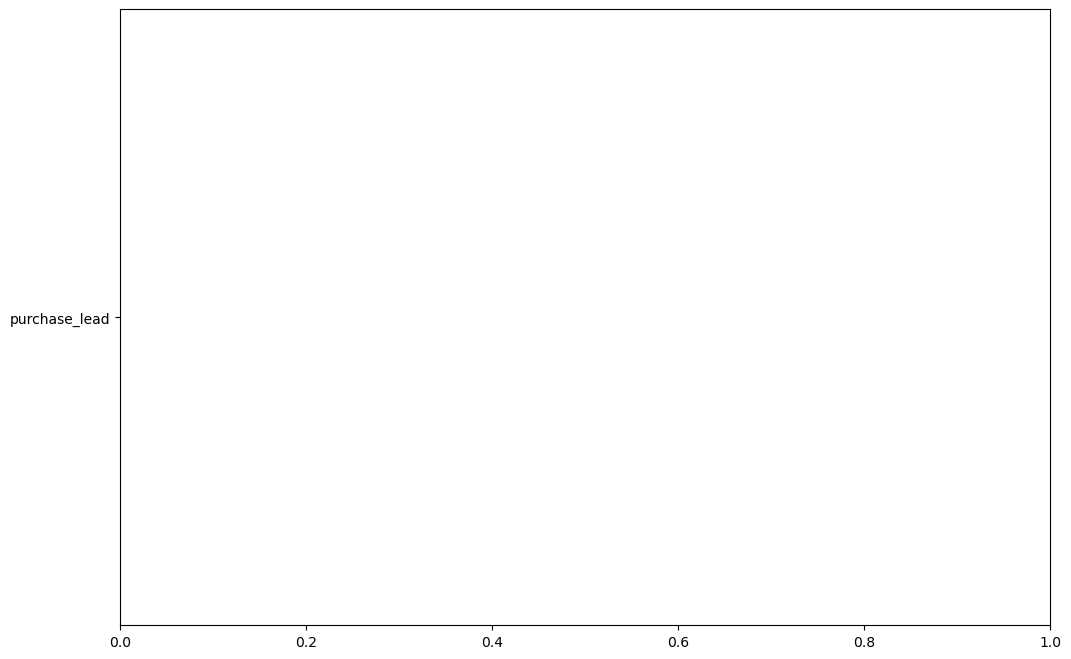

In [15]:
import matplotlib.pyplot as plt

# Feature names and their importance values
features = list(feature_importance_dict.keys())
importance_values = list(feature_importance_dict.values())

# Sort features by importance
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# Plotting
top_n =30
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importance_values[:top_n], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


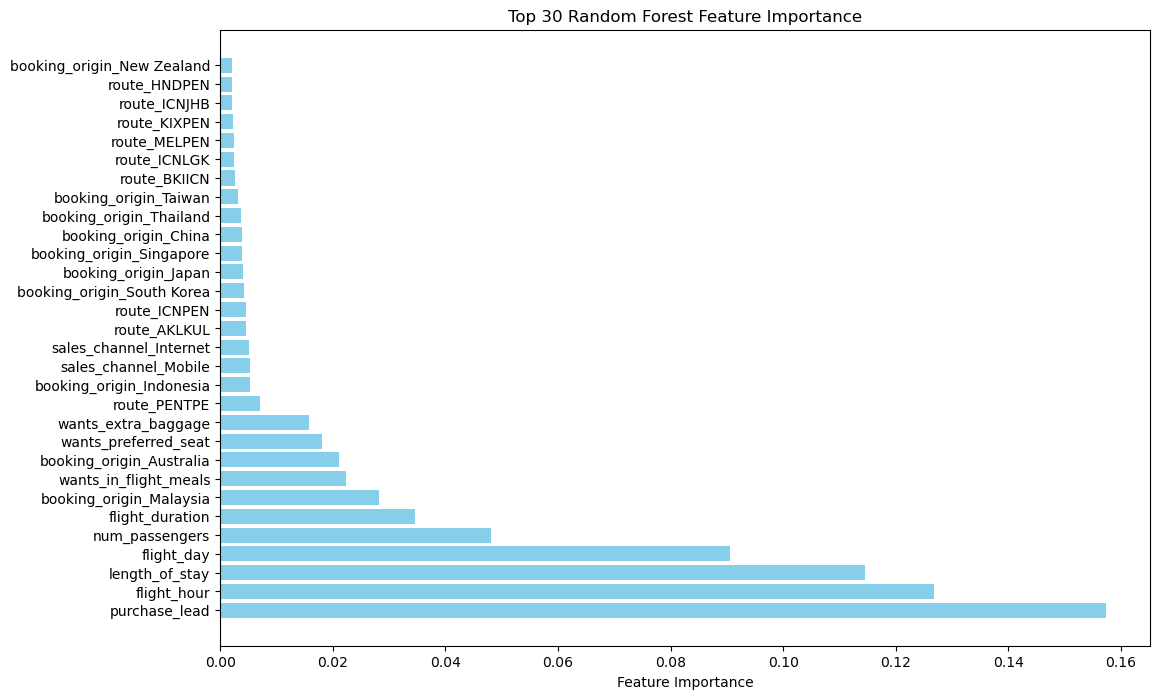

In [16]:
import matplotlib.pyplot as plt

# Feature names and their importance values
features = list(feature_importance_dict.keys())
importance_values = list(feature_importance_dict.values())

# Sort features by importance
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# Plotting the top 30 features
top_n = 30
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:top_n], sorted_importance_values[:top_n], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 30 Random Forest Feature Importance')
plt.show()
